In [26]:
import numpy as np
import pandas as pd
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [12]:
test_df = pd.read_csv('../dataset/test.csv')

In [13]:
test_df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_date,matched_make,matched_model
0,holland,8000,2011.0,hyundai,sonata,good,4 cylinders,gas,117500.0,clean,automatic,fwd,sedan,grey,mi,2021-05-04T14:56:31-0400,hyundai,Sonata
1,springfield,16000,2008.0,lexus,gx 470 4wd,excellent,8 cylinders,gas,179600.0,clean,automatic,4wd,SUV,black,mo,2021-04-13T16:45:46-0500,lexus,GX 470
2,corpus christi,17888,2011.0,toyota,tundra,good,8 cylinders,gas,152825.0,clean,automatic,rwd,pickup,black,tx,2021-04-21T06:24:47-0500,toyota,Tundra 4WD
3,chico,31590,2019.0,ford,ranger supercrew xlt pickup,good,6 cylinders,other,5493.0,clean,other,4wd,pickup,white,ca,2021-04-07T13:21:11-0700,ford,Ranger Pickup 2WD
4,portland,16995,2006.0,toyota,tacoma v6 v6 4dr double cab,good,6 cylinders,gas,0.0,clean,automatic,4wd,pickup,silver,or,2021-05-03T08:57:49-0700,toyota,Tacoma 4WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,pittsburgh,38900,2020.0,ford,transit t250,excellent,6 cylinders,gas,42400.0,clean,automatic,4wd,sedan,white,pa,2021-05-04T13:52:12-0400,ford,Transit Connect Van 2WD
1535,"kansas city, MO",8900,2011.0,mazda,cx-7,excellent,4 cylinders,gas,120000.0,clean,automatic,fwd,SUV,white,ks,2021-04-26T10:20:04-0500,mazda,CX-7 2WD
1536,seattle-tacoma,29499,2012.0,ford,f-350 super duty lariat,good,8 cylinders,gas,140947.0,clean,automatic,4wd,sedan,white,wa,2021-05-04T08:52:02-0700,ford,F-150 Lightning PRO 4WD Extended Range
1537,tucson,31590,2018.0,chevrolet,traverse lt sport,good,6 cylinders,gas,11586.0,clean,other,fwd,SUV,red,az,2021-04-25T11:11:13-0700,chevrolet,Sport Van G10/20 2WD (passenger)


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         1539 non-null   object 
 1   price          1539 non-null   int64  
 2   year           1539 non-null   float64
 3   manufacturer   1539 non-null   object 
 4   model          1539 non-null   object 
 5   condition      1539 non-null   object 
 6   cylinders      1539 non-null   object 
 7   fuel           1539 non-null   object 
 8   odometer       1539 non-null   float64
 9   title_status   1539 non-null   object 
 10  transmission   1539 non-null   object 
 11  drive          1539 non-null   object 
 12  type           1539 non-null   object 
 13  paint_color    1539 non-null   object 
 14  state          1539 non-null   object 
 15  posting_date   1539 non-null   object 
 16  matched_make   1539 non-null   object 
 17  matched_model  1539 non-null   object 
dtypes: float

In [15]:
test_df.drop(columns=['manufacturer', 'model'], inplace=True)

In [16]:
numeric_columns = test_df.select_dtypes(include=['float64', 'int64']).columns

categorical_columns = test_df.select_dtypes(include=['object']).columns

print(f'Numeric >> {numeric_columns}\n')
print(f'Categorical >> {categorical_columns}')

Numeric >> Index(['price', 'year', 'odometer'], dtype='object')

Categorical >> Index(['region', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'type', 'paint_color', 'state', 'posting_date',
       'matched_make', 'matched_model'],
      dtype='object')


In [18]:
encoded_test_df = test_df.copy()

encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    le.fit(encoded_test_df[col])
    encoded_test_df[col] = le.transform(test_df[col])
    encoders[col] = le

In [19]:
encoded_test_df

,region,price,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_date,matched_make,matched_model
0,105,8000,2011.0,2,3,2,117500.0,0,0,1,9,5,22,1505,13,375
1,248,16000,2008.0,0,6,2,179600.0,0,0,0,0,0,24,268,19,209
2,55,17888,2011.0,2,6,2,152825.0,0,0,2,8,0,43,511,33,419
3,46,31590,2019.0,2,5,4,5493.0,0,2,0,8,10,4,75,10,330
4,205,16995,2006.0,2,5,2,0.0,0,0,0,8,9,37,1312,33,391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,202,38900,2020.0,0,5,2,42400.0,0,0,0,9,10,38,1496,10,412
1535,121,8900,2011.0,0,3,2,120000.0,0,0,1,0,10,16,772,21,78
1536,234,29499,2012.0,2,6,2,140947.0,0,0,0,9,10,47,1434,10,169
1537,264,31590,2018.0,2,5,2,11586.0,0,2,1,0,8,3,739,6,382


In [20]:
X_test = encoded_test_df.drop(columns=['price'])
y_test = encoded_test_df['price']

In [21]:
# Load the model from the .pkl file
loaded_model = joblib.load('../models/random_forest_model.pkl')

In [22]:
predictions = loaded_model.predict(X_test)

In [23]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
rmae = np.sqrt(mae)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Root Mean Absolute Error (RMAE): {rmae}")

Mean Squared Error (MSE): 54385415.40546832
Mean Absolute Error (MAE): 5002.73242994128
Root Mean Squared Error (RMSE): 7374.646798692689
Root Mean Absolute Error (RMAE): 70.72999667709084


In [24]:
min_price = y_test.min()
max_price = y_test.max()
mean_price = y_test.mean()

# Calculate RMSE as percentage of price range and mean
rmse_range_pct = (rmse / (max_price - min_price)) * 100
rmse_mean_pct = (rmse / mean_price) * 100

# Print results
print(f"RMSE: ${rmse:,.2f}")
print(f"Price range: ${min_price:,.2f} - ${max_price:,.2f}")
print(f"RMSE as % of price range: {rmse_range_pct:.2f}%")
print(f"RMSE as % of mean price (${mean_price:,.2f}): {rmse_mean_pct:.2f}%")

# Interpretation
if rmse_mean_pct <= 10:
    print("✅ RMSE is excellent!")
elif rmse_mean_pct <= 20:
    print("👍 RMSE is good.")
elif rmse_mean_pct <= 30:
    print("⚠️ RMSE is moderate.")
else:
    print("❌ RMSE might be too high.")

RMSE: $7,374.65
Price range: $1,149.00 - $82,999.00
RMSE as % of price range: 9.01%
RMSE as % of mean price ($18,959.56): 38.90%
❌ RMSE might be too high.


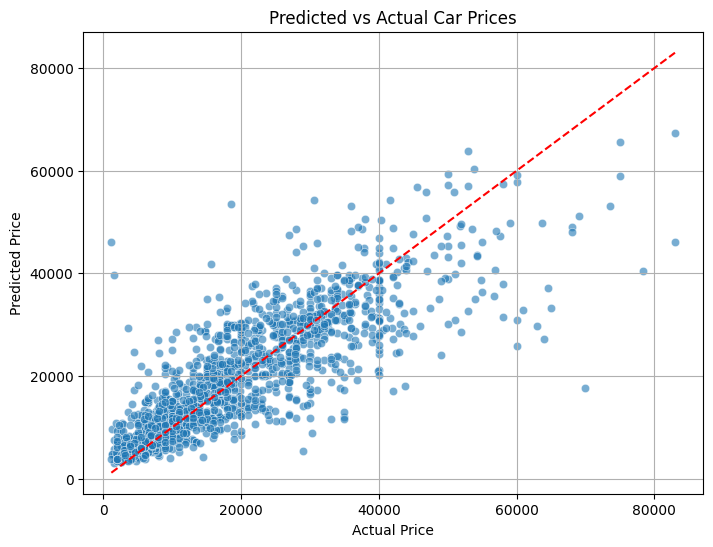

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Car Prices')
plt.grid(True)
plt.show()